In [13]:
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx
from ItalySetup import ItalySetup
from covidOCP import COVIDVaccinationOCP, COVIDParametersOCP
import seaborn as sns
import datetime
import pickle

nx = 9
states_names = ['S', 'E', 'P', 'I', 'A', 'Q', 'H', 'R', 'V']

nnodes = 107  # nodes

# Horizon for each problem
ndays = 'full'
n_int_steps = 1

setup = ItalySetup(nnodes, ndays)
M = setup.nnodes
N = len(setup.model_days) - 1

with open(f'model_output/parameters_{nnodes}.pkl', 'rb') as inp:
    p = pickle.load(inp)


Loaded Italy Setup with 107 nodes.


In [21]:
mydata = pd.read_csv('model_output/test-integ107.csv', index_col= 'date', parse_dates=True, )


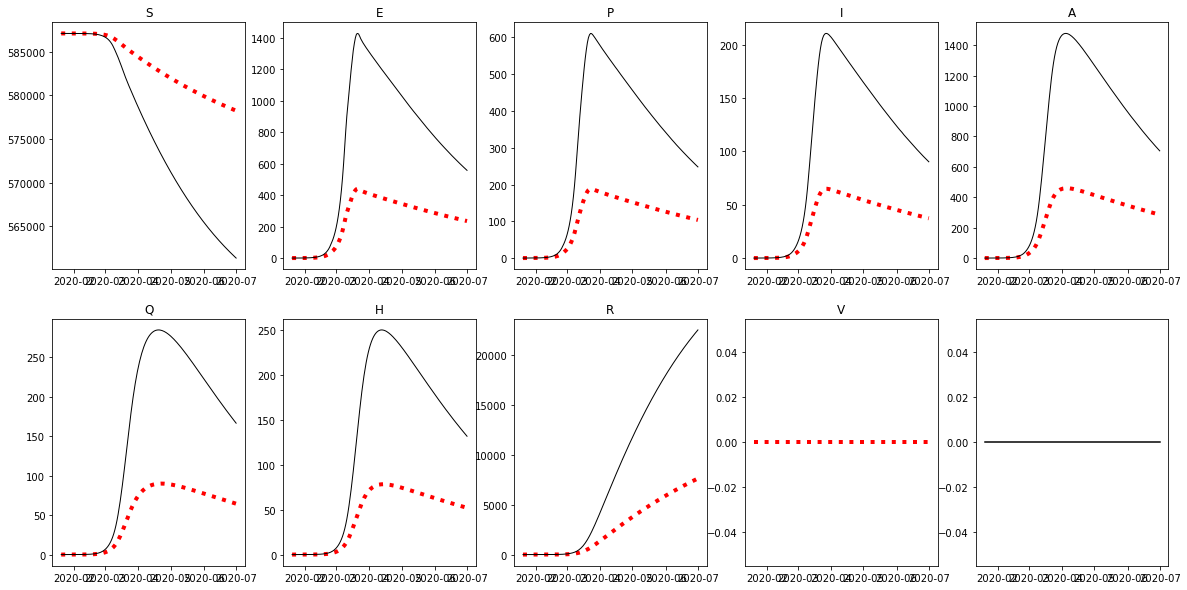

In [22]:
fig, axes = plt.subplots(2,5, figsize = (20,10))
fig.patch.set_facecolor('white')

nd = 3

for i, st in enumerate(states_names):
    axes.flat[i].plot(mydata[(mydata['comp'] == st) & (mydata['placeID'] == nd)]['value'], linestyle=':', lw = 4, color='r')
    if st != 'V':
        axes.flat[i].plot(p.matlab_model_days, p.matlab_initial[nd,:,i], linestyle='-', lw = 1, color='k')

    axes.flat[i].set_title(st);

axes.flat[-1].step(mydata[(mydata['comp'] == 'vacc') & (mydata['placeID'] == nd)]['value'], 'k',label=r"$\nu(t)$");

In [20]:
fig, axes = plt.subplots(5,2, figsize = (10,10))
for i, st in enumerate(states_names):
    for k in range(M):
        axes.flat[i].plot(mydata[(mydata['comp'] == st)].pivot(columns='place', values='value'), lw = 2, ls = '--')
        if st != 'V':
            axes.flat[i].plot(p.matlab_initial[k, :, i]), lw = .5)
        axes.flat[i].set_title(st);
        axes.flat[-1].step(mydata[(mydata['comp'] == 'vacc')].pivot(columns='place', values='value').index,
                           mydata[(mydata['comp'] == 'vacc')].pivot(columns='place', values='value'))

SyntaxError: invalid syntax (<ipython-input-20-e93988c03878>, line 6)

In [ ]:
G = networkx.Graph()
G.position = {}
G.population = {}
G.comp = {}
G.epi = {}
s.shp['vacc'] = np.nan
s.shp['Rend'] = np.nan
for i, node in enumerate(s.ind2name):
    G.add_node(node)
    G.position[node] = (s.pos_node[i,0], s.pos_node[i,1])
    G.population[node] = s.pop_node[i]
    #G.comp[node] = (ocp.ic['S'][i], ocp.ic['I'][i],ocp.ic['R'][i])
    try:
        G.epi[node] = {'vacc': sum(np.array(ca.veccat(ca.veccat(*opt['u',i,:,'v']))))[0],
                   'Rend':                            float(opt['x',i,-1,'R'])}
        s.shp.loc[i, 'vacc'] = sum(np.array(ca.veccat(ca.veccat(*opt['u',i,:,'v']))))[0]
        s.shp.loc[i, 'Rend'] = float(opt['x',i,-1,'R'])
    except NameError as e:
        #print(f'epi data failed, {e}')
        G.epi[node] = {'vacc': np.nan,
                   'Rend':     np.nan}
        s.shp.loc[i, 'vacc'] = np.nan
        s.shp.loc[i, 'Rend'] = np.nan
        
    s.shp.loc[i, 'population'] =  s.pop_node[i] # overwrite 
    for j, connection in enumerate(mobility_history[0][i]):
        if connection != 0:
            G.add_edge(node, s.ind2name[j], weight=connection)
G.number_of_edges()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20, 20))


networkx.draw(G, 
         G.position, 
         node_size=1000/max(s.pop_node) * np.array([G.population[v] for v in G]),
          #node_color=[float(G.degree(v)) for v in G],
        #node_color=[G.population[v] for v in G],
          #node_color=[G.epi[v]['vacc']/G.population[v] for v in G],
          node_color= [G.epi[v]['vacc'] for v in G],
          width = 150* np.array([max(a['weight'],0.003) for u,v,a in G.edges(data=True)]),
          edge_color= 10 * np.array([a['weight'] for u,v,a in G.edges(data=True)]),
          edge_cmap = mpl.cm.viridis,
          ax = ax,
         with_labels=False
       )

#     # scale the axes equally
#plt.xlim(min(s.pos_node[:,0]) - 100000, max(s.pos_node[:,0])+ 100000)
#plt.ylim(min(s.pos_node[:,1]) - 100000, max(s.pos_node[:,1])+ 100000)

#s.shp.plot(ax = ax, column='' cmap='OrRd', facecolor="none", edgecolor="black")

s.shp.boundary.plot(ax = ax,  edgecolor="grey", linewidth = .5)


cmap= mpl.cm.viridis
vmin = min([G.epi[v]['vacc'] for v in G])
vmax = max([G.epi[v]['vacc'] for v in G])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
#sm._A = []
plt.colorbar(sm)

plt.draw()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10, 10))
s.shp.plot(ax = ax, column='vacc', cmap='OrRd',  edgecolor="black") #facecolor="none",

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(1,1,figsize=(4, 4))
plt.scatter(s.shp['vacc']/s.shp['population'], s.shp['Rend']/s.shp['population'], c= s.shp['population'])
ax.set_xlabel("prop. vaccinated")
ax.set_ylabel("prop. recovered");
ax.set_xlim(0)
ax.set_ylim(0, 0.0002)

In [ ]:
sns.scatterplot(s.shp['vacc'], s.shp['population']*100, hue= s.shp['population'])

In [ ]:
grph = networkx.from_numpy_matrix(mobility_history[0])
networkx.draw(grph)